In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
cd ..

/home/jovyan/UCLA_CSX_450_2_2018_W-1/09-wholesale_customers-3


In [3]:
run src/load_data.py

In [4]:
whos 

Variable             Type              Data/Info
------------------------------------------------
StandardScaler       type              <class 'sklearn.preproces<...>ing.data.StandardScaler'>
customer_df          DataFrame              Fresh   Milk  Grocer<...>n\n[440 rows x 6 columns]
customer_final_df    DataFrame                 Fresh      Milk  <...>n\n[435 rows x 6 columns]
customer_log_df      DataFrame                  Fresh       Milk<...>n\n[440 rows x 6 columns]
customer_log_sc      ndarray           440x6: 2640 elems, type `float64`, 21120 bytes
customer_log_sc_df   DataFrame                 Fresh      Milk  <...>n\n[440 rows x 6 columns]
customer_sc          ndarray           440x6: 2640 elems, type `float64`, 21120 bytes
customer_sc_df       DataFrame                 Fresh      Milk  <...>n\n[440 rows x 6 columns]
np                   module            <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
pd                   module            <module 'pandas' from '/o<

In [5]:
np.random.seed(42)

sample_df = customer_final_df.sample(5)
sample_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
285,1.273141,-1.536573,-0.228089,-0.275900,-0.416876,-2.883317
81,-2.273184,0.965103,1.020533,-1.291873,1.272290,-1.249410
116,0.400649,-0.267562,-0.291553,0.017198,-0.616071,-0.977898
258,1.498892,0.281951,-0.703149,1.143766,-0.115584,1.111985
329,-0.131439,-0.756990,-0.010698,0.967911,-0.346264,-0.049861


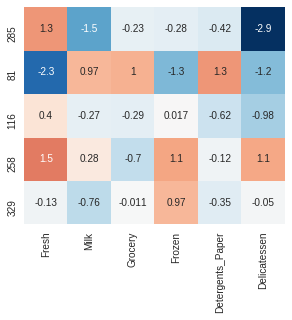

In [6]:
sns.heatmap(sample_df, annot=True, cbar=False, square=True)

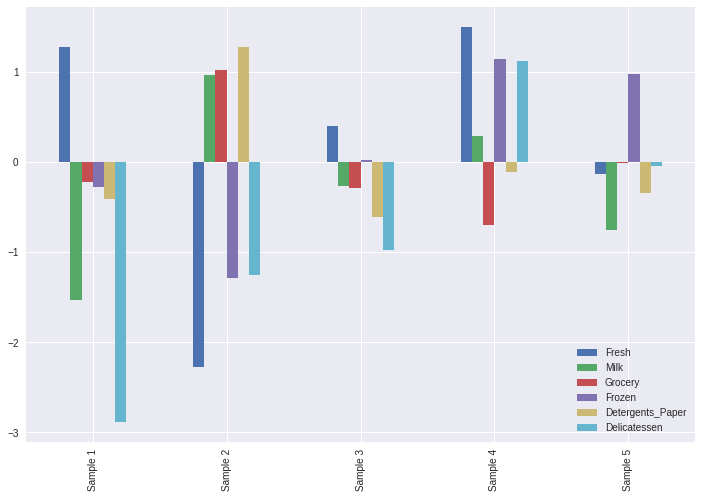

In [7]:
sample_df.plot(kind='bar', figsize=(12,8))
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

## Principal Component Analysis

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA()
pca.fit(customer_final_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Scree Plot

Look for "the bend". This will tell you how many components to keep.

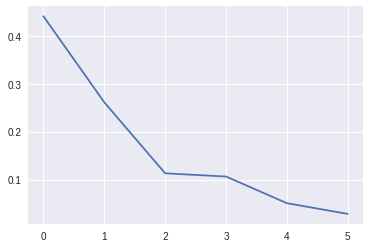

In [10]:
plt.plot(pca.explained_variance_ratio_)

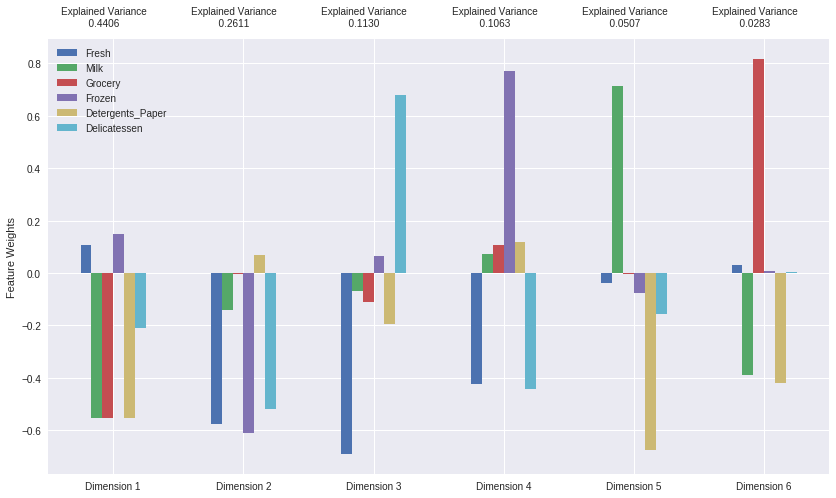

In [11]:
import lib.viz_helper as viz
pca_df = viz.pca_results(customer_final_df, pca)

In [12]:
pca = PCA(2)
pca.fit(customer_final_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
customer_pca_df = pd.DataFrame(pca.transform(customer_final_df), 
                               columns=['Dim 1', 'Dim 2'],
                               index=customer_final_df.index)
sample_pca_df = pd.DataFrame(pca.transform(sample_df), 
                             columns=['Dim 1', 'Dim 2'],
                             index=sample_df.index)

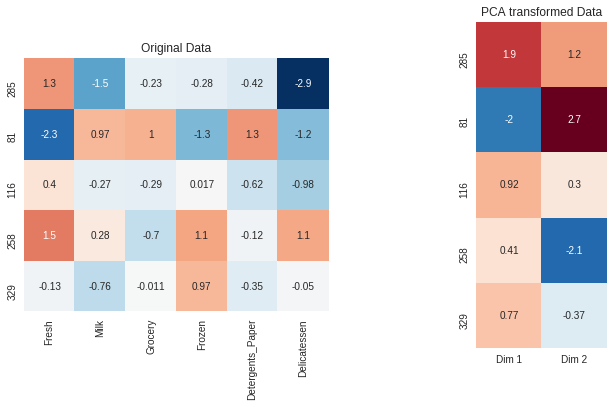

In [14]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(121)
plt.title("Original Data")
sns.heatmap(sample_df, annot=True, cbar=False, square=True)
fig.add_subplot(122)
plt.title("PCA transformed Data")
sns.heatmap(sample_pca_df, annot=True, cbar=False, square=True)

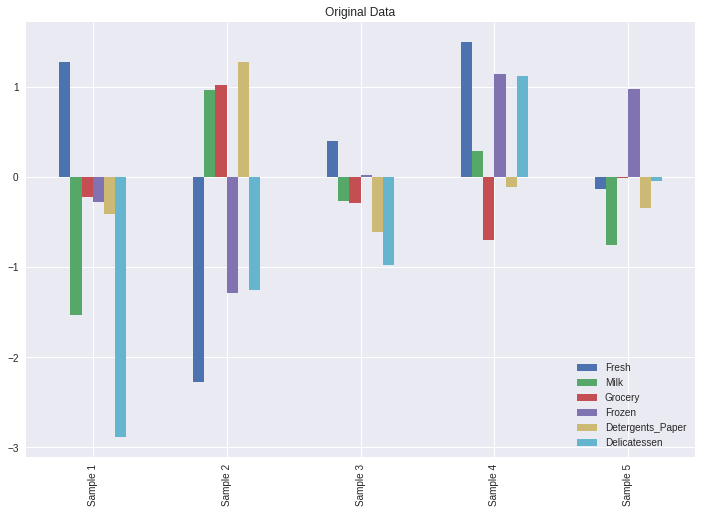

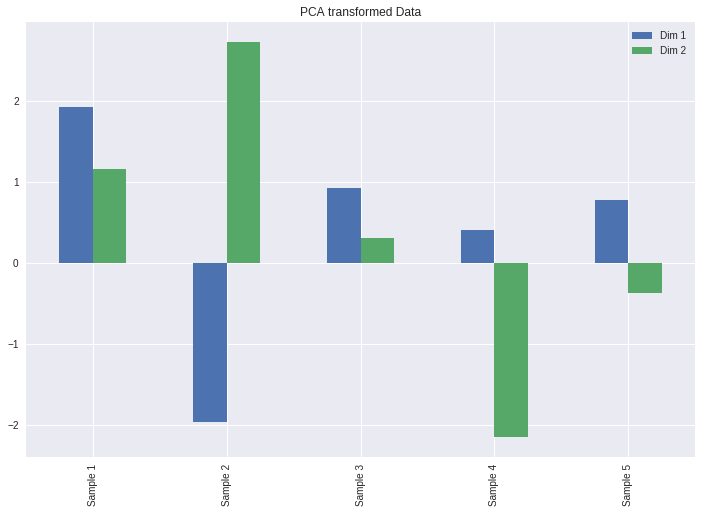

In [15]:
sample_df.plot(kind='bar', figsize=(12,8))
plt.title("Original Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

sample_pca_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])